In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ccxt  # Librairie pour interagir avec les plateformes de trading
import pandas as pd

api_key = "***********************************"
api_secret = "*******************************************"

# Connexion à Binance
exchange = ccxt.binance({
    'apiKey': api_key,
    'secret': api_secret
})

coin = input("Entrez le nom du coin (ex: BTC, ETH, ....) : ").upper()
symbol = f"{coin}/USDT"

timeframe = '1h'  # Intervalle de 1 heure
limit = 72  # Récupérer les 72 dernières bougies (72 heures)
data = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

# Conversion en DataFrame et affichage
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

print(df.tail())



Entrez le nom du coin (ex: BTC, ETH, ....) : BTC
             timestamp      open      high       low     close      volume
67 2025-02-06 11:00:00  99013.30  99120.00  98405.00  98877.99   786.10715
68 2025-02-06 12:00:00  98877.99  99040.09  98283.45  98346.09   860.66993
69 2025-02-06 13:00:00  98346.09  98783.40  98166.70  98604.50   908.47146
70 2025-02-06 14:00:00  98604.50  98924.09  97795.76  97835.98  1875.16497
71 2025-02-06 15:00:00  97835.98  98064.34  97641.72  97828.25   316.39901


In [3]:
df['SMA_14'] = df['close'].rolling(window=14).mean()
print(df.tail())

             timestamp      open      high       low     close      volume  \
67 2025-02-06 11:00:00  99013.30  99120.00  98405.00  98877.99   786.10715   
68 2025-02-06 12:00:00  98877.99  99040.09  98283.45  98346.09   860.66993   
69 2025-02-06 13:00:00  98346.09  98783.40  98166.70  98604.50   908.47146   
70 2025-02-06 14:00:00  98604.50  98924.09  97795.76  97835.98  1875.16497   
71 2025-02-06 15:00:00  97835.98  98064.34  97641.72  97828.25   316.39901   

          SMA_14  
67  97744.968571  
68  97880.715714  
69  98023.006429  
70  98095.079286  
71  98142.834286  


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.1303 - val_loss: 0.0360
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.0669 - val_loss: 0.0058
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0172 - val_loss: 0.0504
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0110 - val_loss: 0.0962
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.0283 - val_loss: 0.0523
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.0083 - val_loss: 0.0234
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.0079 - val_loss: 0.0116
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0138 - val_loss: 0.0093
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 0.0087 - val_loss: 0.0123
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.0088 - val_loss: 0.0188
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 0.0065

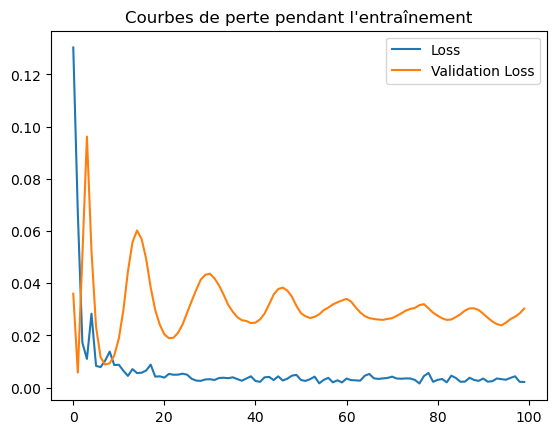

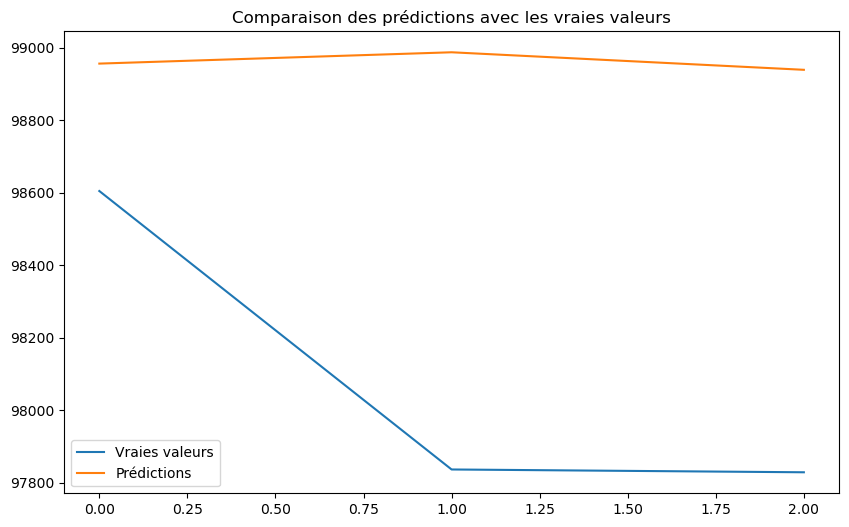

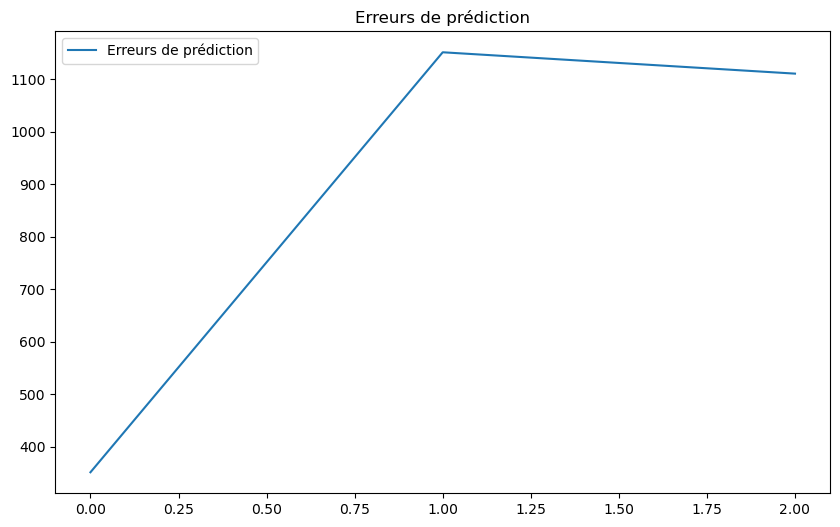

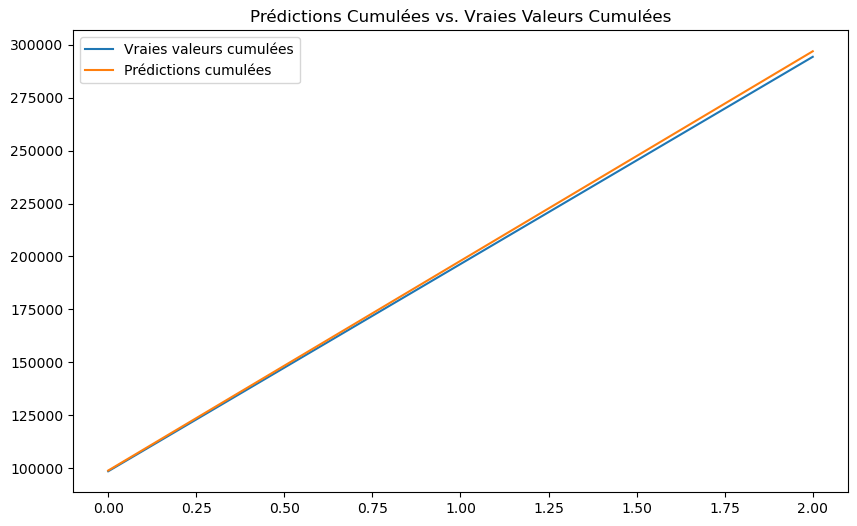

Il vaut mieux acheter la coin, le prix attendu augmentera.


In [4]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler  # Changement vers MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore  


# Utilisation de MinMaxScaler pour normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

# Fonction pour créer les ensembles de données d'entraînement et de test
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Taille de la fenêtre pour les prédictions
X, y = create_dataset(scaled_data, look_back)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Remodeler les données pour correspondre aux entrées LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construire le modèle LSTM avec Dropout pour éviter le surapprentissage
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.3),  # Augmenter le taux de dropout pour régularisation
    tf.keras.layers.LSTM(units=150, return_sequences=False),
    tf.keras.layers.Dropout(0.3),  # Dropout supplémentaire
    tf.keras.layers.Dense(units=100),
    tf.keras.layers.Dense(units=1)
])

# Compiler le modèle avec un optimiseur Adam et un taux d'apprentissage ajusté
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Entraîner le modèle avec plus d'époques
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Prédire les valeurs sur l'ensemble de test
predictions = model.predict(X_test)

# Inverser la normalisation des prédictions
predictions = scaler.inverse_transform(predictions)

# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Afficher les résultats
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Affichage des courbes de perte et de validation
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Courbes de perte pendant l'entraînement")
plt.show()

# Affichage des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Vraies valeurs')
plt.plot(predictions, label='Prédictions')
plt.legend()
plt.title("Comparaison des prédictions avec les vraies valeurs")
plt.show()

# Afficher les erreurs de prédiction
errors = predictions - scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10,6))
plt.plot(errors, label='Erreurs de prédiction')
plt.legend()
plt.title("Erreurs de prédiction")
plt.show()
# --- Prédictions cumulées ---
cumulative_predictions = np.cumsum(predictions)
cumulative_true_values = np.cumsum(scaler.inverse_transform(y_test.reshape(-1, 1)))

plt.figure(figsize=(10,6))
plt.plot(cumulative_true_values, label='Vraies valeurs cumulées')
plt.plot(cumulative_predictions, label='Prédictions cumulées')
plt.legend()
plt.title("Prédictions Cumulées vs. Vraies Valeurs Cumulées")
plt.show()
current_price = df['close'].iloc[-1]  
predicted_price = predictions[-1][0]  
if predicted_price > current_price:
    print(Fore.GREEN + "Il vaut mieux acheter la coin, le prix attendu augmentera.") # Couleur verte
else:
    print(Fore.RED + "Il vaut mieux vendre la coin, le prix attendu baissera.") # Couleur rouge

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import simpledialog
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tensorflow.keras.callbacks import EarlyStopping
from colorama import Fore

# Prétraitement des données (comme dans votre code)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(units=150, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=100),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

class LSTMApp:
    def __init__(self, root):
        self.root = root
        self.root.title("LSTM Stock Price Prediction")

        # Bouton pour saisir le nom de la monnaie
        self.coin_button = ttk.Button(root, text="Saisir le nom de la coin", command=self.get_coin_name)
        self.coin_button.grid(row=0, column=0, padx=10, pady=10)

        # Bouton pour entraîner le modèle (désactivé initialement)
        self.train_button = ttk.Button(root, text="Entraîner le modèle", command=self.train_model, state=tk.DISABLED)
        self.train_button.grid(row=1, column=0, padx=10, pady=10)

        # Labels pour afficher les métriques
        self.mae_label = ttk.Label(root, text="")
        self.mae_label.grid(row=2, column=0, padx=10, pady=10)
        self.rmse_label = ttk.Label(root, text="")
        self.rmse_label.grid(row=3, column=0, padx=10, pady=10)

        # Label pour afficher la valeur actuelle
        self.current_price_label = ttk.Label(root, text="Valeur actuelle : N/A")
        self.current_price_label.grid(row=4, column=0, padx=10, pady=10)

        # Label pour afficher la valeur prédite
        self.predicted_price_label = ttk.Label(root, text="Valeur prédite : N/A")
        self.predicted_price_label.grid(row=5, column=0, padx=10, pady=10)

        # Label pour afficher la recommandation
        self.recommendation_label = ttk.Label(root, text="Recommandation : N/A")
        self.recommendation_label.grid(row=6, column=0, padx=10, pady=10)

        # Bouton pour afficher les résultats
        self.plot_button = ttk.Button(root, text="Afficher les résultats", command=self.plot_results, state=tk.DISABLED)
        self.plot_button.grid(row=7, column=0, padx=10, pady=10)

        # Surface pour afficher le graphique
        self.figure_canvas = None

    def get_coin_name(self):
        self.coin_name = simpledialog.askstring("Nom de la coin", "Entrez le nom de la coin :")
        if self.coin_name:
            self.train_button.config(state=tk.NORMAL)
            self.plot_button.config(state=tk.NORMAL)
            print(f"Nom de la COIN sélectionnée : {self.coin_name}")

    def train_model(self):
        history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])
        self.predictions = model.predict(X_test)
        self.predictions = scaler.inverse_transform(self.predictions)
        
        mae = mean_absolute_error(y_test, self.predictions)
        rmse = np.sqrt(mean_squared_error(y_test, self.predictions))
        
        self.mae_label.config(text=f"MAE: {mae}")
        self.rmse_label.config(text=f"RMSE: {rmse}")

        # Valeur actuelle (la dernière valeur dans df['close'])
        current_price = df['close'].iloc[-1]

        # Valeur prédite (la dernière prédiction du modèle)
        predicted_price = self.predictions[-1][0]

        # Mise à jour des labels
        self.current_price_label.config(text=f"Valeur actuelle : {current_price:.2f}")
        self.predicted_price_label.config(text=f"Valeur prédite : {predicted_price:.2f}")

        # Affichage de la recommandation
        if predicted_price > current_price:
            recommendation_text = "Il vaut mieux acheter la coin, le prix attendu augmentera."
            recommendation_color = Fore.GREEN
        else:
            recommendation_text = "Il vaut mieux vendre la coin, le prix attendu baissera."
            recommendation_color = Fore.RED

        # Mettre à jour le label avec la recommandation
        self.recommendation_label.config(text=recommendation_text)
        print(recommendation_color + recommendation_text)  # Affichage du message dans la console aussi

    def plot_results(self):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Vraies valeurs')
        ax.plot(self.predictions, label='Prédictions')
        ax.legend()
        ax.set_title(f"Comparaison des prédictions avec les vraies valeurs pour {self.coin_name}")

        # Afficher le graphique dans Tkinter
        if self.figure_canvas:
            self.figure_canvas.get_tk_widget().destroy()
        
        self.figure_canvas = FigureCanvasTkAgg(fig, master=self.root)
        self.figure_canvas.draw()
        self.figure_canvas.get_tk_widget().grid(row=8, column=0, padx=10, pady=8)

root = tk.Tk()
app = LSTMApp(root)
root.mainloop()
